In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [ ]:
df = pd.read_csv('data.csv')

,rs_CLEC3A,rs_CPB1,rs_SCGB2A2,rs_SCGB1D2,rs_TFF1,rs_MUCL1,rs_GSTM1,rs_PIP,rs_ADIPOQ,rs_ADH1B,...,pp_p27.pT198,pp_p38.MAPK,pp_p38.pT180.Y182,pp_p53,pp_p62.LCK.ligand,pp_p70S6K,pp_p70S6K.pT389,pp_p90RSK,pp_p90RSK.pT359.S363,vital.status
0,0.892818,6.580103,14.123672,10.606501,13.189237,6.649466,10.520335,10.338490,10.248379,10.229970,...,-0.043330,-0.002598,0.449228,-0.375230,-0.691766,-0.337863,-0.178503,0.011638,-0.207257,0
1,0.000000,3.691311,17.116090,15.517231,9.867616,9.691667,8.179522,7.911723,1.289598,1.818891,...,-0.220764,0.220809,1.035115,-0.074136,0.279067,0.292925,-0.155242,-0.089365,0.267530,0
2,3.748150,4.375255,9.658123,5.326983,12.109539,11.644307,10.517330,5.114925,11.975349,11.911437,...,0.010615,-0.133214,0.344969,-0.351936,0.219910,0.308110,-0.190794,-0.222150,-0.198518,0
3,0.000000,18.235519,18.535480,14.533584,14.078992,8.913760,10.557465,13.304434,8.205059,9.211476,...,0.064070,-0.384008,0.678042,0.096329,-0.266554,-0.079871,-0.463237,0.522998,-0.046902,0
4,0.000000,4.583724,15.711865,12.804521,8.881669,8.430028,12.964607,6.806517,4.294341,5.385714,...,-0.065488,0.209858,0.920408,0.042210,-0.441542,-0.152317,0.511386,-0.096482,0.037473,0


In [3]:
df.shape

(705, 1937)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Columns: 1937 entries, rs_CLEC3A to vital.status
dtypes: float64(827), int64(1110)
memory usage: 10.4 MB


In [12]:
df.isnull().sum()

rs_CLEC3A               0
rs_CPB1                 0
rs_SCGB2A2              0
rs_SCGB1D2              0
rs_TFF1                 0
                       ..
pp_p70S6K               0
pp_p70S6K.pT389         0
pp_p90RSK               0
pp_p90RSK.pT359.S363    0
vital.status            0
Length: 1937, dtype: int64

In [14]:
y = df['vital.status']
X = df.drop(columns=['vital.status'])

In [15]:
y.unique()

array([0, 1], dtype=int64)

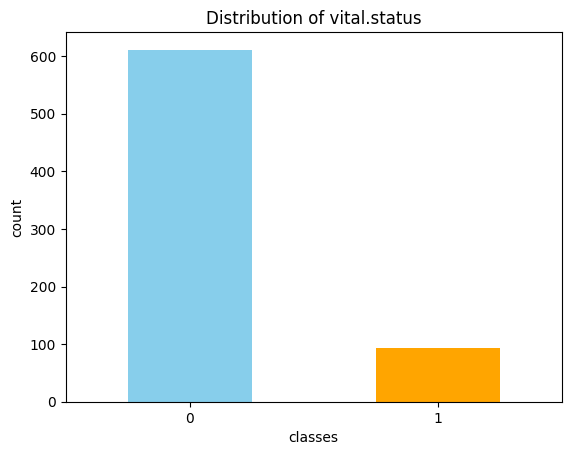

In [17]:
# Visualize the distribution of the response variable
# Response is imbalanced
y.value_counts().plot(kind='bar', color=['skyblue', 'orange'])

plt.title('Distribution of vital.status')
plt.xlabel('classes')
plt.ylabel('count')
plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0)
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Random Forest Before UpSampling
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred_rf = model.predict(X_test_scaled)
print('F1_Score :', f1_score(y_test, y_pred_rf))
print('----------------------------')
print('Accuracy Score:', accuracy_score(y_test, y_pred_rf))
print('----------------------------')
print(classification_report(y_test, y_pred_rf))

F1_Score : 0.34782608695652173
----------------------------
Accuracy Score: 0.8936170212765957
----------------------------
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       122
           1       1.00      0.21      0.35        19

    accuracy                           0.89       141
   macro avg       0.95      0.61      0.64       141
weighted avg       0.91      0.89      0.86       141



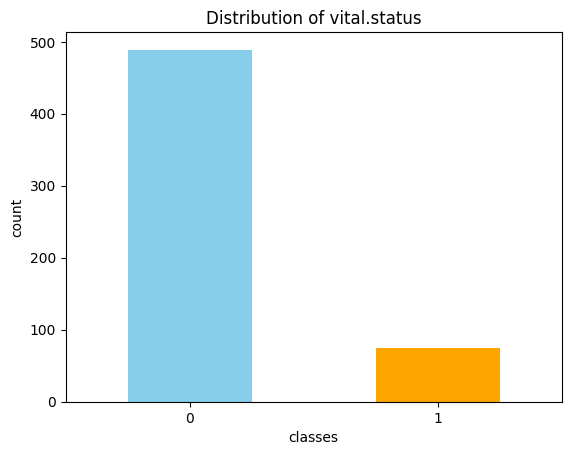

In [24]:
# Visualize the distribution of the response variable
# Response is imbalanced
y_train.value_counts().plot(kind='bar', color=['skyblue', 'orange'])

plt.title('Distribution of vital.status')
plt.xlabel('classes')
plt.ylabel('count')
plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0)
plt.show()

In [34]:
# Balancing the dataset using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)  
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

print('X shape = ', X_train_scaled.shape)
print('X_res shape = ', X_res.shape)
print('y shape = ', y_train.shape)
print('y_res shape = ', y_res.shape)

X shape =  (564, 1936)
X_res shape =  (978, 1936)
y shape =  (564,)
y_res shape =  (978,)


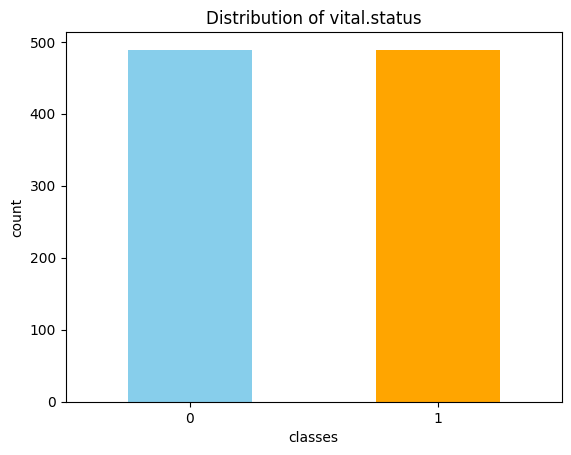

In [35]:
# Visualize the distribution of the response variable
# Response is imbalanced
y_res.value_counts().plot(kind='bar', color=['skyblue', 'orange'])

plt.title('Distribution of vital.status')
plt.xlabel('classes')
plt.ylabel('count')
plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0)
plt.show()

In [36]:
#CatBoost Classifier
model_cat = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=0)
model_cat.fit(X_res, y_res)
y_pred_cat = model_cat.predict(X_test_scaled)

# Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_res, y_res)
y_pred_rf = model_rf.predict(X_test_scaled)

# XGBoost Classifier
model_xgb = XGBClassifier(n_estimators=100, random_state=42)
model_xgb.fit(X_res, y_res)
y_pred_xgb = model_xgb.predict(X_test_scaled)

# LightGBM Classifier
model_lgbm = LGBMClassifier(verbose=0)
model_lgbm.fit(X_res, y_res)
y_pred_lgbm = model_lgbm.predict(X_test_scaled)

# K-Nearest Neighbors Classifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_res, y_res)
y_pred_knn = model_knn.predict(X_test_scaled)

# Gaussian Naive Bayes Classifier
model_gnb = GaussianNB()
model_gnb.fit(X_res, y_res)
y_pred_GNB = model_gnb.predict(X_test_scaled)

# AdaBoost Classifier
model_ada = AdaBoostClassifier(n_estimators=100, random_state=42)
model_ada.fit(X_res, y_res)
y_pred_ada = model_ada.predict(X_test_scaled)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Program Files (x86)\python 3.10\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [37]:
print('CatBoost F1 Score:', f1_score(y_test, y_pred_cat))
print('CatBoost ACC:', accuracy_score(y_test, y_pred_cat))
print('----------------------------')
print('Random Forest F1 Score:', f1_score(y_test, y_pred_rf))
print('Random Forest ACC:', accuracy_score(y_test, y_pred_rf))
print('----------------------------')
print('XGBoost F1 Score:', f1_score(y_test, y_pred_xgb))
print('XGBoost ACC:', accuracy_score(y_test, y_pred_xgb))
print('----------------------------')
print('LightGBM F1 Score:', f1_score(y_test, y_pred_lgbm))
print('LightGBM ACC:', accuracy_score(y_test, y_pred_lgbm))
print('----------------------------')
print('K-Nearest Neighbors F1 Score:', f1_score(y_test, y_pred_knn))
print('K-Nearest Neighbors ACC:', accuracy_score(y_test, y_pred_knn))
print('----------------------------')
print('Gaussian Naive Bayes F1 Score:', f1_score(y_test, y_pred_GNB))
print('Gaussian Naive Bayes ACC:', accuracy_score(y_test, y_pred_GNB))
print('----------------------------')
print('AdaBoost F1 Score:', f1_score(y_test, y_pred_ada))
print('AdaBoost ACC:', accuracy_score(y_test, y_pred_ada))

CatBoost F1 Score: 0.4
CatBoost ACC: 0.8936170212765957
----------------------------
Random Forest F1 Score: 0.38461538461538464
Random Forest ACC: 0.8865248226950354
----------------------------
XGBoost F1 Score: 0.34782608695652173
XGBoost ACC: 0.8936170212765957
----------------------------
LightGBM F1 Score: 0.4
LightGBM ACC: 0.8936170212765957
----------------------------
K-Nearest Neighbors F1 Score: 0.26865671641791045
K-Nearest Neighbors ACC: 0.3049645390070922
----------------------------
Gaussian Naive Bayes F1 Score: 0.21621621621621623
Gaussian Naive Bayes ACC: 0.5886524822695035
----------------------------
AdaBoost F1 Score: 0.23529411764705882
AdaBoost ACC: 0.8156028368794326


In [38]:
models = ['CatBoost', 'Random Forest', 'XGBoost', 'LightGBM', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'AdaBoost']
accuracy_scores = [accuracy_score(y_test, y_pred_cat), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_xgb), accuracy_score(y_test, y_pred_lgbm), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_GNB), accuracy_score(y_test, y_pred_ada)]

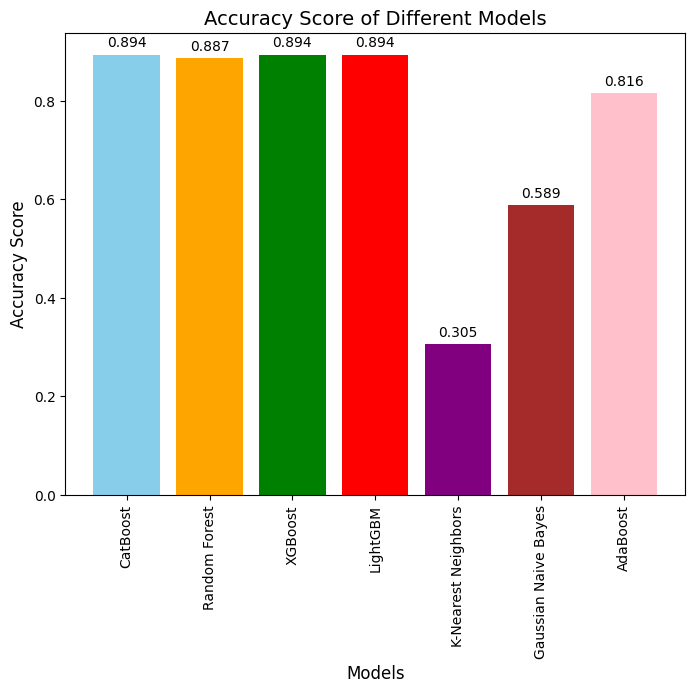

In [40]:
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink'])


plt.title('Accuracy Score of Different Models', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)


for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center', va='bottom', fontsize=10)


plt.xticks(rotation=90)


plt.show()